# 単語の分散表現
gensim + Word2Vec

英語のWikipediaからclean text （句読点、$,#, %など除去、括弧、アルファベットはすべて小文字、数字は除去）
とした"text8"と呼ばれるデータにGoogleが2013年に開発したword2vecという単語の分散表現モデルによって、
約7万英単語を200次元の密ベクトル表現したものをvectors.binとして用意しています。
ここでは、このvectors.binというバイナリデータをPythonのgensimパッケージを通して
ロードし、類義語が見つかるかどうかを確かめます。

なお、このような単語の分散表現モデルはネット上に、いろいろ公開されており、
総じて単語分散表現モデルとか、単語埋込モデルと呼ばれます。
深層学習モデルで、テキストを処理するアプリケーションでは、このような単語埋込モデルを
Embedding層の初期値として用いることが多く慣行されています。

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)

import gensim
import numpy as np
import gensim.models as mdl


In [2]:
import os
print (os.getcwd())


C:\Users\jtcuser\DeepLearning


# Gensimの使い方例

https://radimrehurek.com/gensim/models/keyedvectors.html

In [3]:
# 事前にWikipediaの部分集合(text8)から作成された200次元のベクトル
model = mdl.KeyedVectors.load_word2vec_format('data/vectors.bin', binary=True)

In [4]:
model.most_similar(positive=['woman','king'], negative=['man'])


[('queen', 0.5720019340515137),
 ('matilda', 0.5227001905441284),
 ('daughter', 0.5097631216049194),
 ('betrothed', 0.506864607334137),
 ('heiress', 0.4963929057121277),
 ('isabella', 0.4918372929096222),
 ('regent', 0.48817452788352966),
 ('montferrat', 0.477775901556015),
 ('son', 0.47766247391700745),
 ('savoy', 0.47525760531425476)]

In [5]:
model.most_similar(positive=['male','boy'], negative=['female'])


[('girl', 0.39684516191482544),
 ('turboexpress', 0.3575460910797119),
 ('booji', 0.3447113037109375),
 ('handhelds', 0.33930259943008423),
 ('baby', 0.33783677220344543),
 ('man', 0.3360194265842438),
 ('nintendo', 0.3324439525604248),
 ('orphan', 0.3281562030315399),
 ('boys', 0.32154223322868347),
 ('child', 0.31663763523101807)]

In [6]:
model.most_similar(positive=['female','girlfriend'], negative=['male'])


[('boyfriend', 0.5477264523506165),
 ('betty', 0.4965442419052124),
 ('stripper', 0.4948104918003082),
 ('pamela', 0.4681965112686157),
 ('dolores', 0.4653899669647217),
 ('fiancee', 0.46262404322624207),
 ('roz', 0.45947110652923584),
 ('lorna', 0.4554259777069092),
 ('peggy', 0.4532727599143982),
 ('rebecca', 0.4532467722892761)]

In [7]:
from sklearn import decomposition # for PCA
dimension = 200 # dimension of Word2Vec data named vectors.bin

keyword = ['paris', 'france', 'berlin', 'germany', 
           'king', 'woman', 'man', 'queen', 
           'boy', 'girl', 'prince', 'princess', 
           'cd', 'dvd', 'music', 'movie', 
           'dog', 'dogs', 'child', 'children', 
           'japan', 'tokyo', 'taiwan', 'taipei', 
           'peace', 'war', 'positive', 'negative']

In [8]:
x = np.zeros((len(keyword),dimension),dtype=float) # 2次元配列の確保
for i in range(len(keyword)):
    x[i,:]=model[keyword[i]] # copy 200-dim word2vec data for selected keyword


In [9]:
# 主成分分析
pca = decomposition.PCA(n_components=2) # PCA to reduce to 2-dimensional space
myTrans = pca.fit_transform(x) # reduce to 2-d


In [10]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import numpy as np # Numpy
import matplotlib
import matplotlib.pyplot as plt # 描画ライブラリ
print (matplotlib.rcParams.get('font.family'))
import matplotlib.font_manager as fm
import matplotlib.patheffects as path_effects

font_prop = fm.FontProperties()  
font_prop.set_style('normal')
font_prop.set_weight('light')
font_prop.set_size('12')

fp2 = font_prop.copy()# フォントプロパティ(FP)をコピー
fp2.set_size('20')# フォントプロパティ(FP)をコピー
fp2.set_family('serif')# フォントはSerif(明朝体など）に設定

['sans-serif']


In [11]:
def myPlot():
    myData = myTrans # np.load('myChosenWord2vec.npy')
    plt.clf()
    plt.figure(figsize=(12,11))
    title = 'Two dimensional projection'
    plt.title(title,fontsize=25,font_properties=fp2)
    plt.xlabel("$X_1$",fontsize=20,font_properties=fp2) # 第１主成分
    plt.ylabel("$X_2$",fontsize=20,font_properties=fp2) # 第２主成分

    x1 = myData[:,0] # first dimension (28 keywords' X-position)
    x2 = myData[:,1] # second dimension (28 keywrods' Y-position)
    keyword = ['paris', 'france', 'berlin', 'germany', 
               'king', 'woman', 'man', 'queen', 
               'boy', 'girl', 'prince', 'princess', 
               'cd', 'dvd', 'music', 'movie', 
               'dog', 'dogs', 'child', 'children', 
               'japan', 'tokyo', 'taiwan', 'taipei', 
               'peace', 'war', 'positive', 'negative']

    plt.scatter(x1, x2, edgecolor="blue", facecolor="blue", s=20) # scalefactor 20
    for i in range(len(keyword)):
        plt.text(x1[i]-1.5, x2[i]+0.75, 
                 keyword[i], 
                 color="black",
                 fontsize=20,font_properties=fp2) # keyword text plot
    plt.grid(True)
    plt.show()


<Figure size 432x288 with 0 Axes>

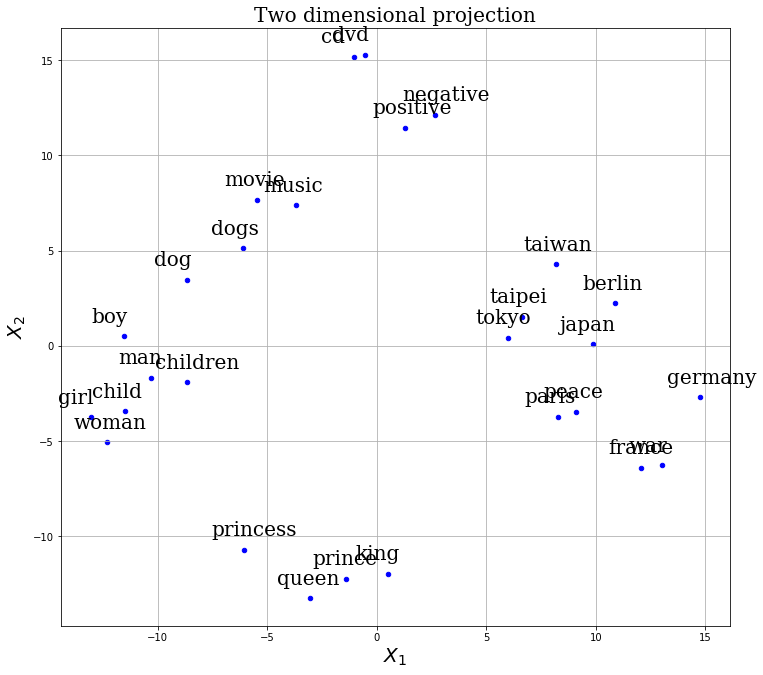

In [12]:
myPlot()


In [13]:
model.similarity('woman', 'man')


0.642852328977037

In [14]:
model.doesnt_match("breakfast cereal dinner lunch".split())


'cereal'

In [15]:
model.distance("paris","france")

0.4469790651250187

In [16]:
model.distance("paris","germany")

0.6922171791979231

In [17]:
vector1 = model['office']
print(vector1.shape)
print(np.round(vector1,3))

(200,)
[-2.036  2.501  1.51   3.3    0.136 -1.45   2.504 -0.538 -0.008  0.044
  1.218 -1.192  1.541 -1.888 -1.552  0.24  -2.237  0.603 -0.413  2.337
  0.34   0.884  3.636  0.92  -0.887  0.016  1.861 -0.246  0.419  0.666
 -0.976 -1.587  1.181  0.429 -0.67   2.493  1.388 -1.028 -1.518 -1.527
 -1.114 -0.494 -0.198  0.181 -0.478 -1.96   1.752 -2.661  1.045 -2.913
 -3.06   0.176  1.131 -0.865  0.96   2.702 -0.13   0.613  1.646 -0.498
  1.247 -0.89   0.382 -0.921  2.916  0.196 -0.888 -2.201 -1.588  1.549
  0.542 -2.233 -0.118 -1.298  2.944 -3.834  3.181 -1.583  2.029  1.321
 -0.301  0.073 -1.548  2.946 -0.484  0.086 -0.894 -1.088 -0.855 -0.818
  2.381 -0.316  0.359  0.263  0.841 -0.285  2.611 -3.334  0.961  0.514
  2.684 -1.526  1.789  1.472  0.475 -4.069  0.188  1.584  1.012  1.363
 -1.423  1.547 -0.048  0.787 -0.719  0.695  2.234 -2.405  0.504 -0.186
 -1.259  1.593  1.098 -1.257 -1.805  2.468  0.986  0.694 -0.13  -1.965
  2.122  0.086 -0.904 -1.537 -2.2    4.215 -1.752 -2.938 -0.692  0.145